In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('facebook_ads.csv',encoding='latin-1')
df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [3]:
df['Country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
Malaysia               1
Name: Country, Length: 210, dtype: int64

In [4]:
df=df.drop(['Names','emails','Country'],axis=1)


In [5]:
df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

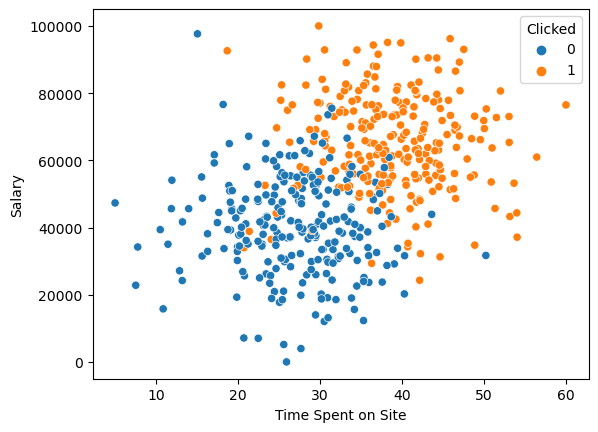

In [6]:
sns.scatterplot(data=df,x=df['Time Spent on Site'],y=df['Salary'],hue=df['Clicked'])

In [7]:
df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [8]:
X=df[['Time Spent on Site','Salary']]

In [9]:
y=df['Clicked']

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max=MinMaxScaler()

In [12]:
X=min_max.fit_transform(X)


In [13]:
X

array([[0.37544814, 0.55321124],
       [0.49920194, 0.79044886],
       [0.28992687, 0.41086826],
       [0.89162409, 0.37130782],
       [0.53181325, 0.37342581],
       [0.85472629, 0.8063878 ],
       [0.68875217, 0.61900778],
       [0.37594399, 0.29837379],
       [0.64905877, 0.34267972],
       [0.44886112, 0.41087096],
       [0.51404676, 0.54117841],
       [0.53692542, 0.30207979],
       [0.36933991, 0.43752748],
       [0.7552856 , 0.48653225],
       [0.59484694, 0.64688915],
       [0.36466877, 0.17743483],
       [0.65629019, 0.49453272],
       [0.35930115, 0.38472118],
       [0.79763955, 0.34761396],
       [0.41516058, 0.5163482 ],
       [0.22006501, 0.61654096],
       [0.37450538, 0.53621488],
       [0.67725799, 0.3220154 ],
       [0.58428949, 0.51724002],
       [0.49896566, 0.51668033],
       [0.27157589, 0.34250639],
       [0.63310071, 0.70497413],
       [0.46779736, 0.67015676],
       [0.34624696, 0.36462002],
       [0.61920065, 0.29164194],
       [0.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
#Classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


In [18]:
svm=SVC()
lr=LogisticRegression()
knn= KNeighborsClassifier()
nb=BernoulliNB()
rf=RandomForestClassifier()


In [21]:
#hyperparameters
param_svm={'classifier__C':[0.01,0.1,1,10,100], 'classifier':[svm]}
param_lr={'classifier__penalty':['l1','l2'],'classifier':[lr]}
param_knn={'classifier__n_neighbors':[2,5,10,15,20],'classifier':[knn]}
param_nb={'classifier__alpha':[1,10,100],'classifier':[nb]}
param_rf={'classifier__n_estimators':[50,100,500,1000],'classifier__max_depth':[3,5,10,None],'classifier__max_leaf_nodes':[3,5,7,10,None],'classifier':[rf]}

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
pipe=Pipeline([('classifier',svm)])

In [24]:
params=[param_svm,param_lr,param_knn,param_nb,param_rf]

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [27]:
gs=GridSearchCV(pipe,params,cv=3,scoring='roc_auc')

In [28]:
gs.fit(X_train,y_train)

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 285.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, s

GridSearchCV(cv=3, estimator=Pipeline(steps=[('classifier', SVC())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.01, 0.1, 1, 10, 100]},
                         {'classifier': [LogisticRegression()],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [2, 5, 10, 15, 20]},
                         {'classifier': [BernoulliNB()],
                          'classifier__alpha': [1, 10, 100]},
                         {'classifier': [RandomForestClassifier(max_depth=3,
                                                                max_leaf_nodes=7,
                                                                n_estimators=50)],
                          'classifier__max_depth': [3, 5, 10, None],
                          'classifier__max_leaf_nodes': [3, 5, 7, 10, None],
                          'classifier

In [29]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=3, max_leaf_nodes=7, n_estimators=50),
 'classifier__max_depth': 3,
 'classifier__max_leaf_nodes': 7,
 'classifier__n_estimators': 50}

In [30]:
gs.best_score_

0.9572317074081543

In [ ]:
from sklearn.